# Abalone Age Estimation from Physical Measurements
## Phase 1: Data Preparation & Visualisation

#### Group Name: Project Group 32

#### Name(s) & ID(s) of Group Members: 
Ahmed Shams Saif - s3961227\
Vadhthanak Vibol - S3951117\
Tanvir Rahman Taiyeb - s3965287\
Jake O'Brien - s3896637\
Mahfuzul Hasan - s3956803
#### 

## Table of Contents
* [Introduction](#itr) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)



## Introduction <a id='itr'></a>

### Dataset Source

Data comes from an original (non-machine-learning) study:
Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994)
"The Population Biology of Abalone (Haliotis species) in Tasmania. I. Blacklip Abalone (H. rubra) from the North Coast and Islands of Bass Strait",
Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288)



### Dataset Details

This dataset is used to estimate the age of how old an abalone is. The slow process of finding the age of an abalone takes quite a long time, as it requires cautious and attentiveness to find each physical measurement of the abalone. We will need to cut up the abalone, staining it and finally counting the amount of rings that the abalone has. Other factors such as it's length, diameter, height and weight will be useful to tell how the abalone lived and how it has grown.

This dataset has a total of 9 features and 4178 observations.

**Dataset Retrieval**

- We read in the dataset from our GitHub repository and load the modules we will use throughout this report.
- We display 20 rows from this dataset.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) 

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None) 


cdc = pd.read_csv("abolone.csv")
cdc.sample(10, random_state=999)

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3259,M,0.640,0.505,0.165,1.4435,0.6145,0.3035,0.3900,18
3583,F,0.625,0.500,0.175,1.2730,0.5640,0.3020,0.3740,9
1932,F,0.620,0.495,0.170,1.0620,0.3720,0.2130,0.3400,11
3328,I,0.575,0.475,0.170,0.9670,0.3775,0.2840,0.2750,13
2426,I,0.565,0.435,0.155,0.7820,0.2715,0.1680,0.2850,14
2353,F,0.720,0.560,0.175,1.7265,0.6370,0.3415,0.5250,17
708,M,0.360,0.295,0.130,0.2765,0.0895,0.0570,0.1005,10
1168,M,0.620,0.450,0.200,0.8580,0.4285,0.1525,0.2405,8
120,F,0.470,0.365,0.105,0.4205,0.1630,0.1035,0.1400,9
2041,I,0.325,0.240,0.070,0.1520,0.0565,0.0305,0.0540,8


In [3]:
cdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Dataset Features

The features in our dataset are described in the table below. These descriptions are taken from the data.world data source.

In [4]:
from tabulate import tabulate
table = [['Name', 'Data type', 'Units', 'Description'],
         ['Sex', 'nominal', 'N/A', 'M, F, and I (infant)'],
         ['Length', 'continuous', 'mm', 'Longest shell measurement'],
         ['Height', 'continuous', 'grams', 'with meat in shell'],
         ['Whole weight', 'continuous', 'grams', 'whole abalone weight'],
         ['Shucked weight', 'continuous', 'grams', 'weight of meat'],
         ['Viscera weight', 'continuous', 'grams', 'after being dried'],
         ['Rings', 'integer', 'N/A', '+1.5 gives the age in years']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤═════════════╤═════════╤═════════════════════════════╕
│ Name           │ Data type   │ Units   │ Description                 │
╞════════════════╪═════════════╪═════════╪═════════════════════════════╡
│ Sex            │ nominal     │ N/A     │ M, F, and I (infant)        │
├────────────────┼─────────────┼─────────┼─────────────────────────────┤
│ Length         │ continuous  │ mm      │ Longest shell measurement   │
├────────────────┼─────────────┼─────────┼─────────────────────────────┤
│ Height         │ continuous  │ grams   │ with meat in shell          │
├────────────────┼─────────────┼─────────┼─────────────────────────────┤
│ Whole weight   │ continuous  │ grams   │ whole abalone weight        │
├────────────────┼─────────────┼─────────┼─────────────────────────────┤
│ Shucked weight │ continuous  │ grams   │ weight of meat              │
├────────────────┼─────────────┼─────────┼─────────────────────────────┤
│ Viscera weight │ continuous  │ grams   │ after be

### Target Feature

For this project, the target feature in this dataset will be the age of the Abalone in years. That is, the ages will be predicted based on the observational variables.

## Goals and Objectives

The purpose of this data analysis is to give insight for further generations about how different characteristics of abalone can help people understand their ages. For example using the predictive model people are able to identify the age and type of abalone depending on its physical characteristics.  The main objective of the project is to identify and be able to predict the age of abalone depending on its physical characteristics. Furthermore another objective is to gain a better understanding in how the ages of abalone vary depending on different patterns or relationships that exist in the data. Additionally it can help with abalone fishing companies when dealing with the creature, to see if can catch a higher price due to it's age, plus it's taste depending on it's age, the taste can be different.

## Data Cleaning and Preprocessing

In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

### Data Cleaning Steps

*   Drop irrelevant features in our dataset
*   Check and rename/ modify some column names
*   Check for missing values
*   Remove all the rows with missing values 
*   Random sampling of the dataset for 5000 rows

Let's first display all the columns in our dataset.

In [5]:
cdc.columns

Index(['Gender', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

To find the age of each abalone, we will need to take the amount of rings it has and add it by 1.5. Additionally making it easier for viewing, we added it into the table for the user to see how old each abalone is.

In [6]:
cdc['Age'] = cdc['Rings'] + 1.5
cdc.head()

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [7]:
from tabulate import tabulate
table = [['Name', 'Data type', 'Units', 'Description'],
         ['Age', 'continuos', 'years', 'Age of abalone']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════╤═════════════╤═════════╤════════════════╕
│ Name   │ Data type   │ Units   │ Description    │
╞════════╪═════════════╪═════════╪════════════════╡
│ Age    │ continuos   │ years   │ Age of abalone │
╘════════╧═════════════╧═════════╧════════════════╛


Next we check the data types and observe that they match the intended data types, thus no change is needed here. 

In [8]:
# Check for data types
print(f"Shape of the dataset = {cdc.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(cdc.dtypes)

Shape of the dataset = (4177, 10) 

Data types are below where 'object' indicates a string type: 
Gender             object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age               float64
dtype: object


The unique values for all columns with categorical data types are displayed to check for any white spaces and other data quality issues. It turns out that the data is already clean, and no futher data cleaning steps are necessary here. 

In [9]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
cdc.describe(include='object').T

,count,unique,top,freq
Gender,4177,3,M,1528


In [10]:
# To see all unique values for categorical data types
categoricalColumns = cdc.columns[cdc.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(cdc[col].unique())
    print('')

Unique values for Gender
['M' 'F' 'I']



The summary statistics are generated for all the numerical features. There does not seem to be any outliers in the data. 

In [11]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
cdc.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000
Age,4177.0,11.433684,3.224169,2.5000,9.5000,10.5000,12.500,30.5000


No missing values are found in this dataset.

In [12]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
print(cdc.isnull().sum())


Number of missing values for each column/ feature:
Gender            0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64


### Random Sampling

As the data has more than 3000 rows, random sampling is done to get only 3000 rows out of the remaining 4177 rows for ease of computation. At the end, we display 5 random rows from our cleaned data.

In [13]:
cdc = cdc.sample(n=3000, random_state=999)
cdc.shape
cdc.sample(5, random_state=999)

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
3354,F,0.455,0.360,0.110,0.4385,0.2060,0.0980,0.1250,10,11.5
1294,I,0.520,0.395,0.125,0.6630,0.3005,0.1310,0.1905,9,10.5
3781,M,0.615,0.455,0.130,0.9685,0.4900,0.1820,0.2655,10,11.5
961,F,0.505,0.390,0.130,0.6740,0.3165,0.1410,0.1785,9,10.5
1273,I,0.475,0.380,0.120,0.4410,0.1785,0.0885,0.1505,8,9.5


## Data Exploration and Visualisation

Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

### Univariate Visualisation



#### Boxplot  of Whole Weight

From Figure 1, we can see the most common weight of abolone is between 0.5 and 1 gram.

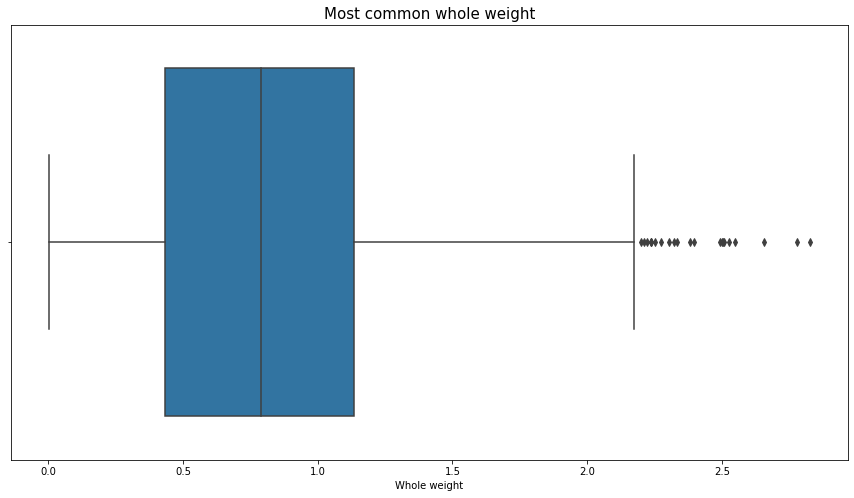

In [14]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.figure(figsize = (15,8))
sns.boxplot(cdc['Whole weight']).set_title('Most common whole weight', fontsize = 15)
plt.show();

#### Bar Chart of Height

From Figure 2, we can see the most common Height of abolone is around the height of 0.2mm.

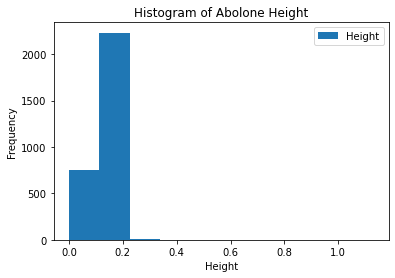

In [15]:
plt.hist(cdc['Height'], label = "Height")
plt.title('Histogram of Abolone Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Boxplot of Age

We can see the most common age of abalone is between 10 and 15 years, this graph is right skewed showing that most abalone live to just over 10 years.

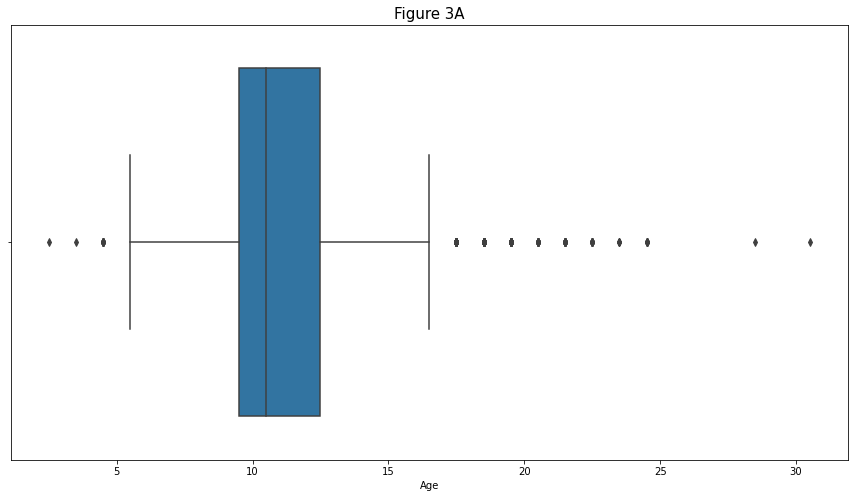

In [16]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.figure(figsize = (15,8))
sns.boxplot(cdc['Age']).set_title('Figure 3A', fontsize = 15)
plt.show();

#### Boxplot of Rings

We can see the most common amount of rings in abalone is between about 6 and 12 rings, this graph is right skewed similar to the box plot of age which shows a direct correlation between rings and age of abalone.

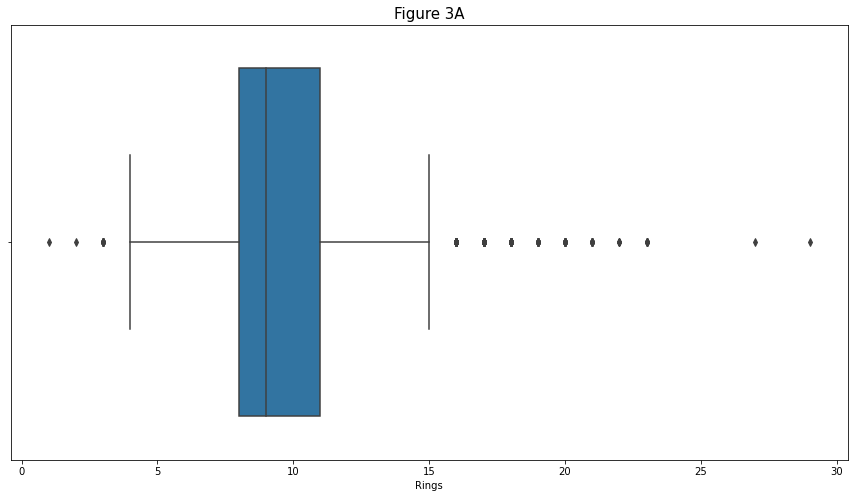

In [17]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.figure(figsize = (15,8))
sns.boxplot(cdc['Rings']).set_title('Figure 3A', fontsize = 15)
plt.show();

### Two-Variable Visualisation

#### Pairplot (Scatter plot and Histogram) of Age and Whole weight of Abolone

Figure__ shows that there is a correlation between Age and Whole Weight. As the age increases, the whole weight tends to be higher. Not only that it shows the correlation of the weight and the age, it also shows that both the history of the weight and the Age of the abalone is right skewed to the positive direction.

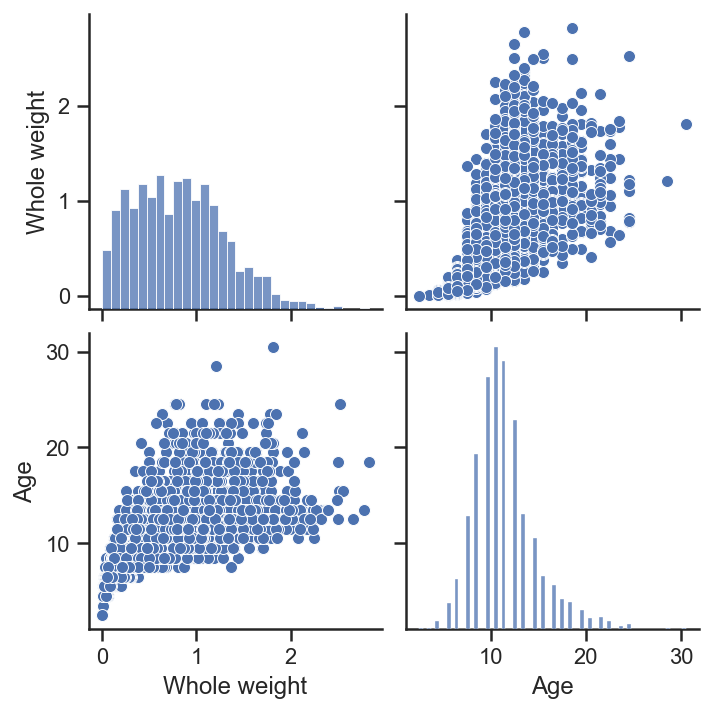

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)
import seaborn as sns
sns.set(style="ticks", color_codes = True)

sns.pairplot(cdc, vars = ['Whole weight', 'Age'])
plt.show();

#### Boxplot of counts of each gender

This graph here shows the different count of each abalone gender. It helps us identify which abalone gender is the most common out there. Looking at the graph, it tells us that the Male abalone is the most common out of all, while the female is the least common 


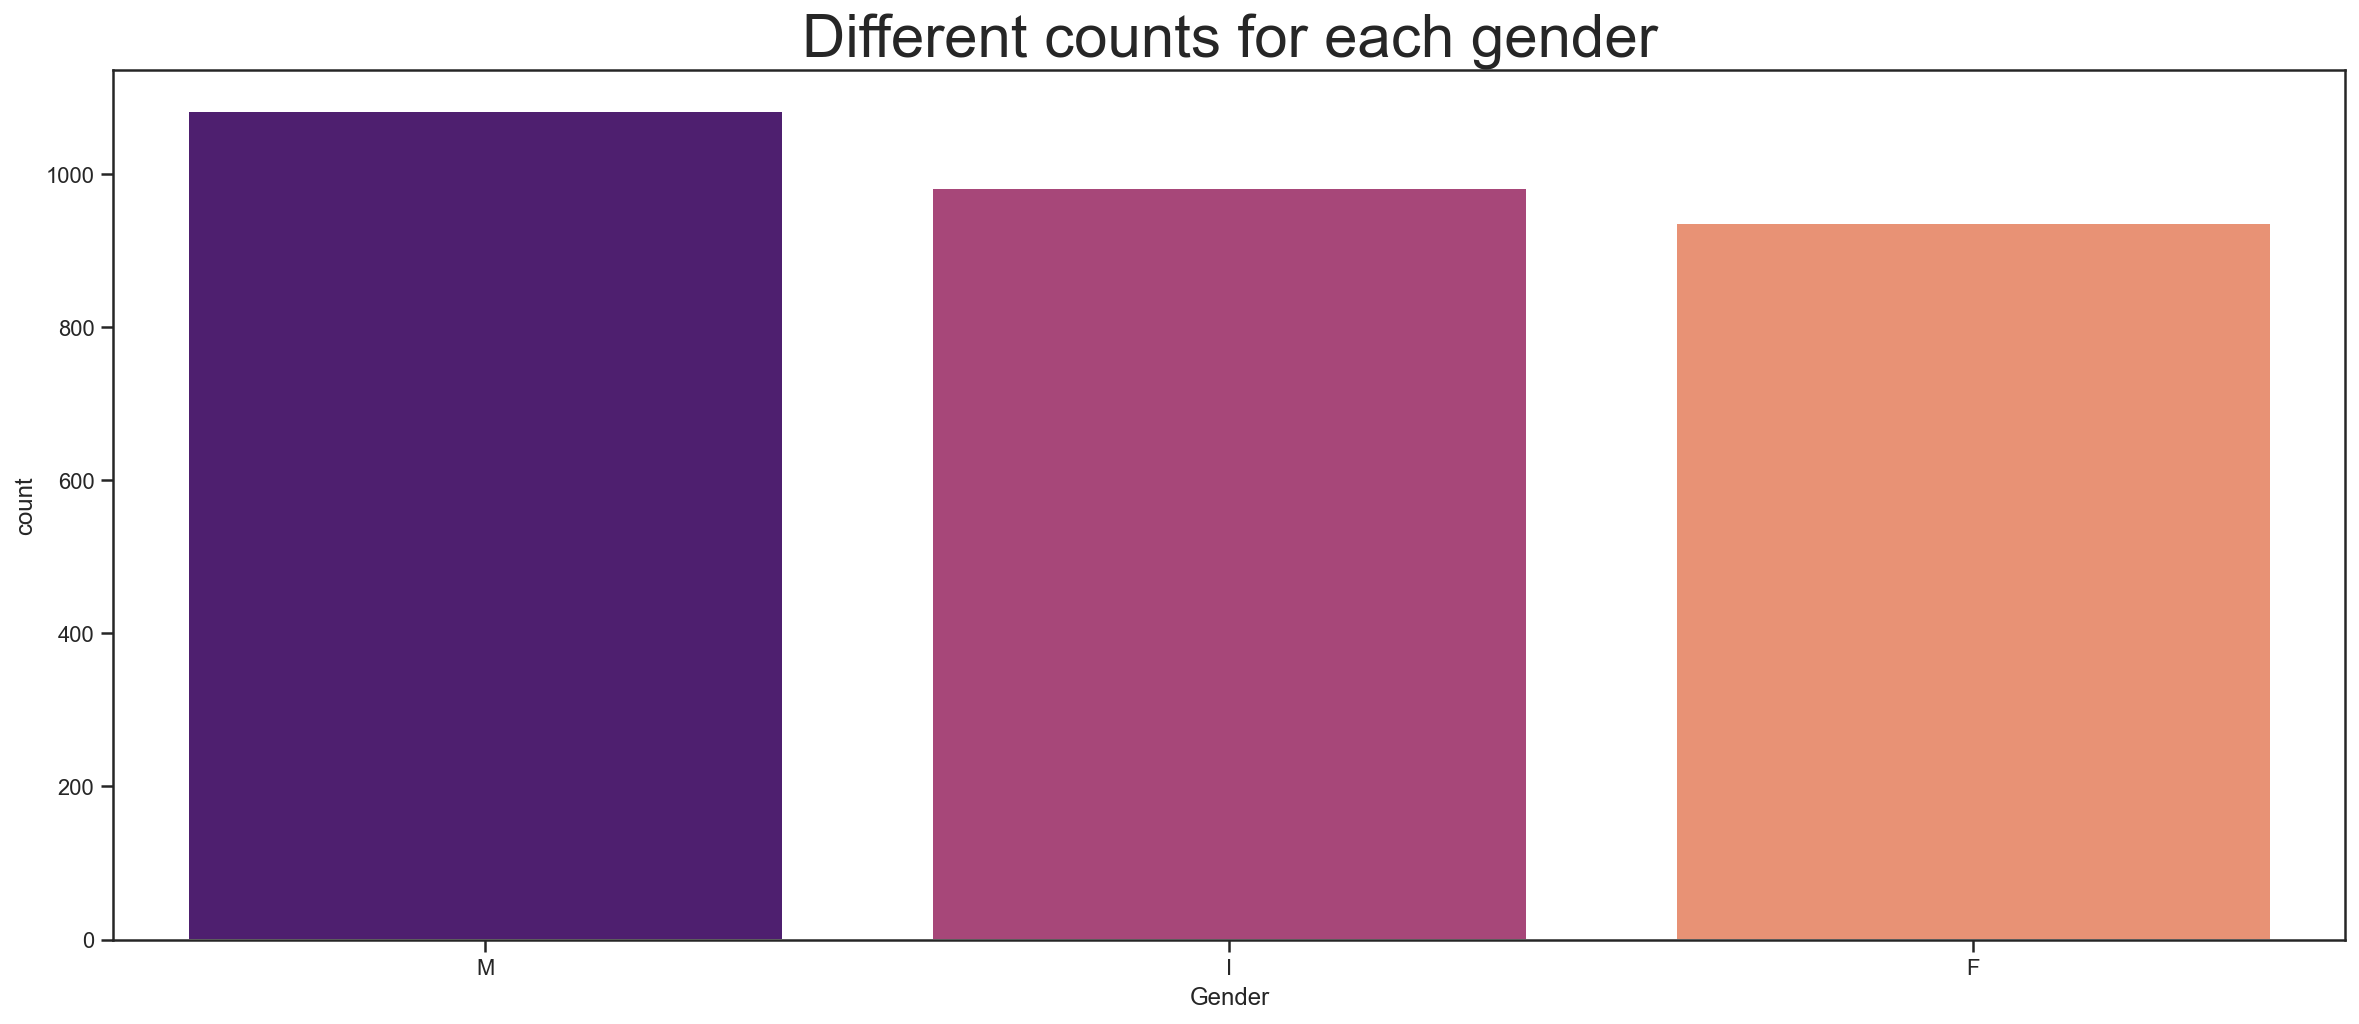

In [19]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'Gender', data = cdc, palette = 'magma', 
                    order = cdc['Gender'].value_counts().index)
fig = plt.title('Different counts for each gender', fontsize = 30)
plt.show()

#### Scatterplot of Shell weight by age

This scatter plot compares how much each shell weights according to age of the abalone

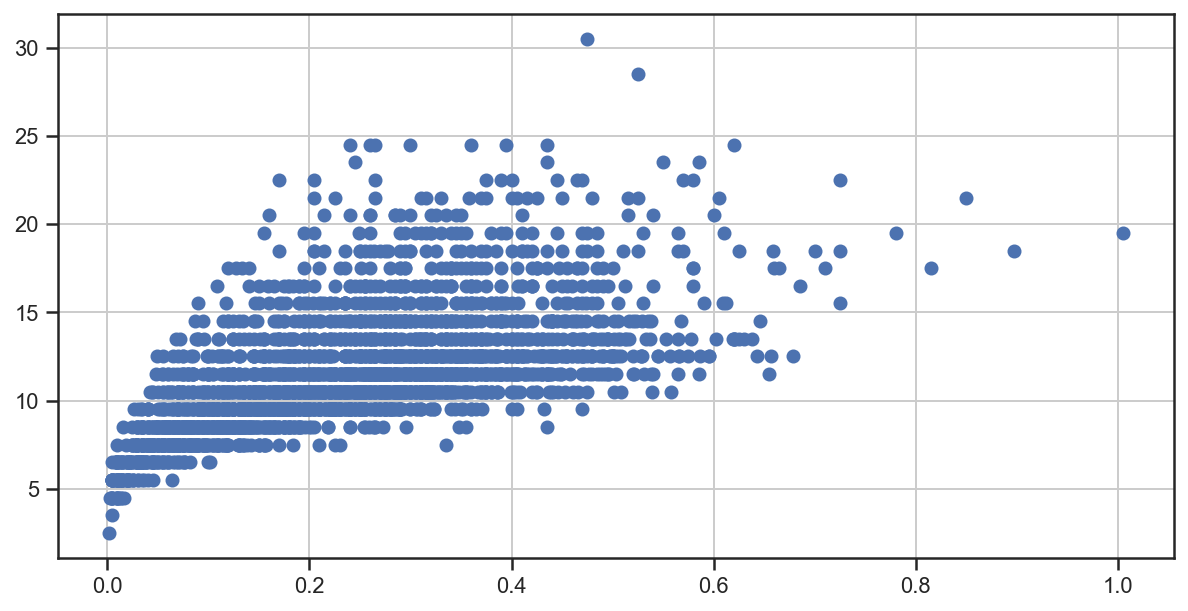

In [20]:
var = 'Shell weight'
plt.scatter(x = cdc[var], y = cdc['Age'])
plt.grid(True)

#### Scatterplot of Shucked weight by age

This scatter plot compares how much each meat weights according to age of the abalone

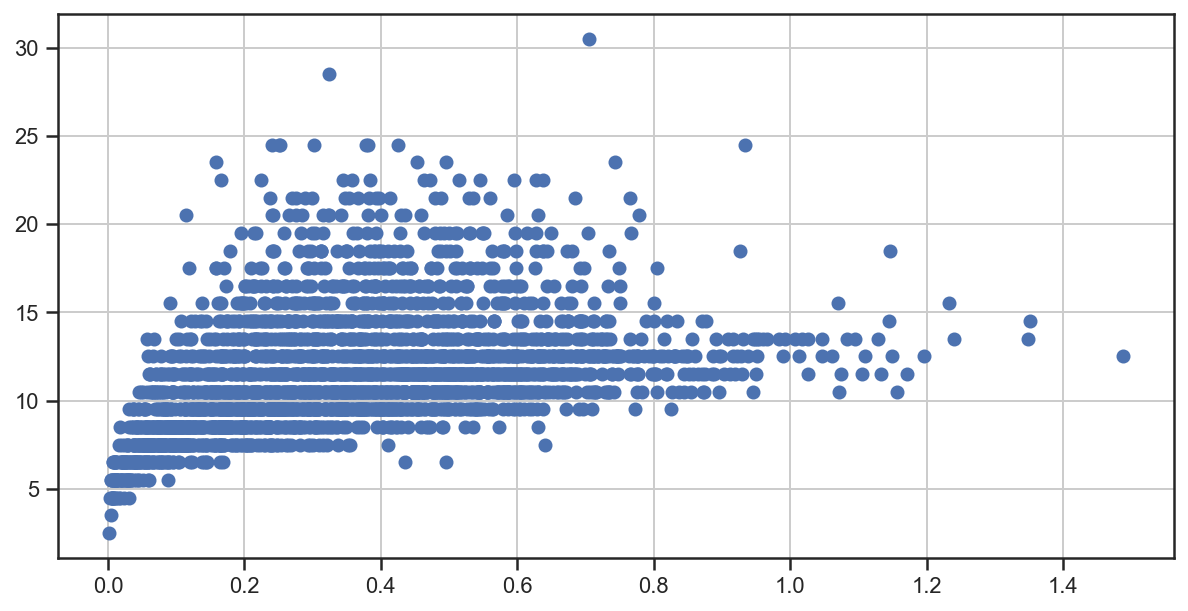

In [21]:
var = 'Shucked weight'
plt.scatter(x = cdc[var], y = cdc['Age'])
plt.grid(True)

#### Scatterplot of Viscera weight by age

This scatter plot compares how much each dried abalone weights according to age of the abalone

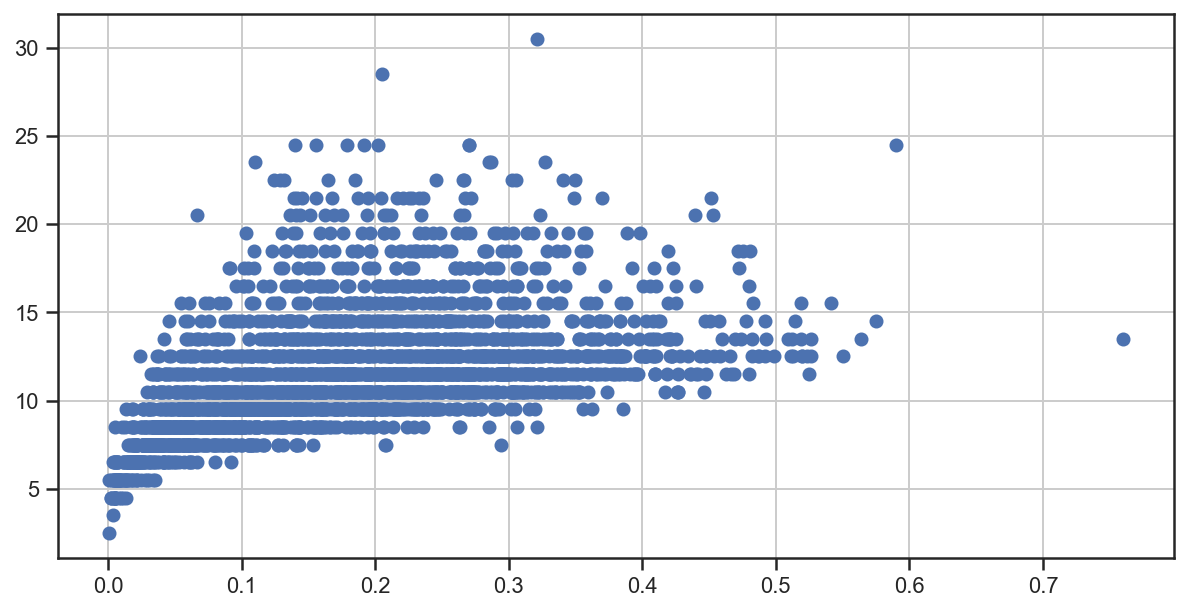

In [22]:
var = 'Viscera weight'
plt.scatter(x = cdc[var], y = cdc['Age'])
plt.grid(True)

#### Each type of weight by age explanataion

Comparing the 3 scatter graphs we can see not much changes in the data when comparing each type of weight to the ages of the abalone. What we can observe here is that the shell weight seems to weigh the most, while the shucked and viscera weight are similar in data.

#### Boxplot of the weight depending on the Rings

Looking into this boxplot to determine if the amount of ring will affect the weight of the abalone or not, we can observe that the rings don't contribute into the weighting of abalones

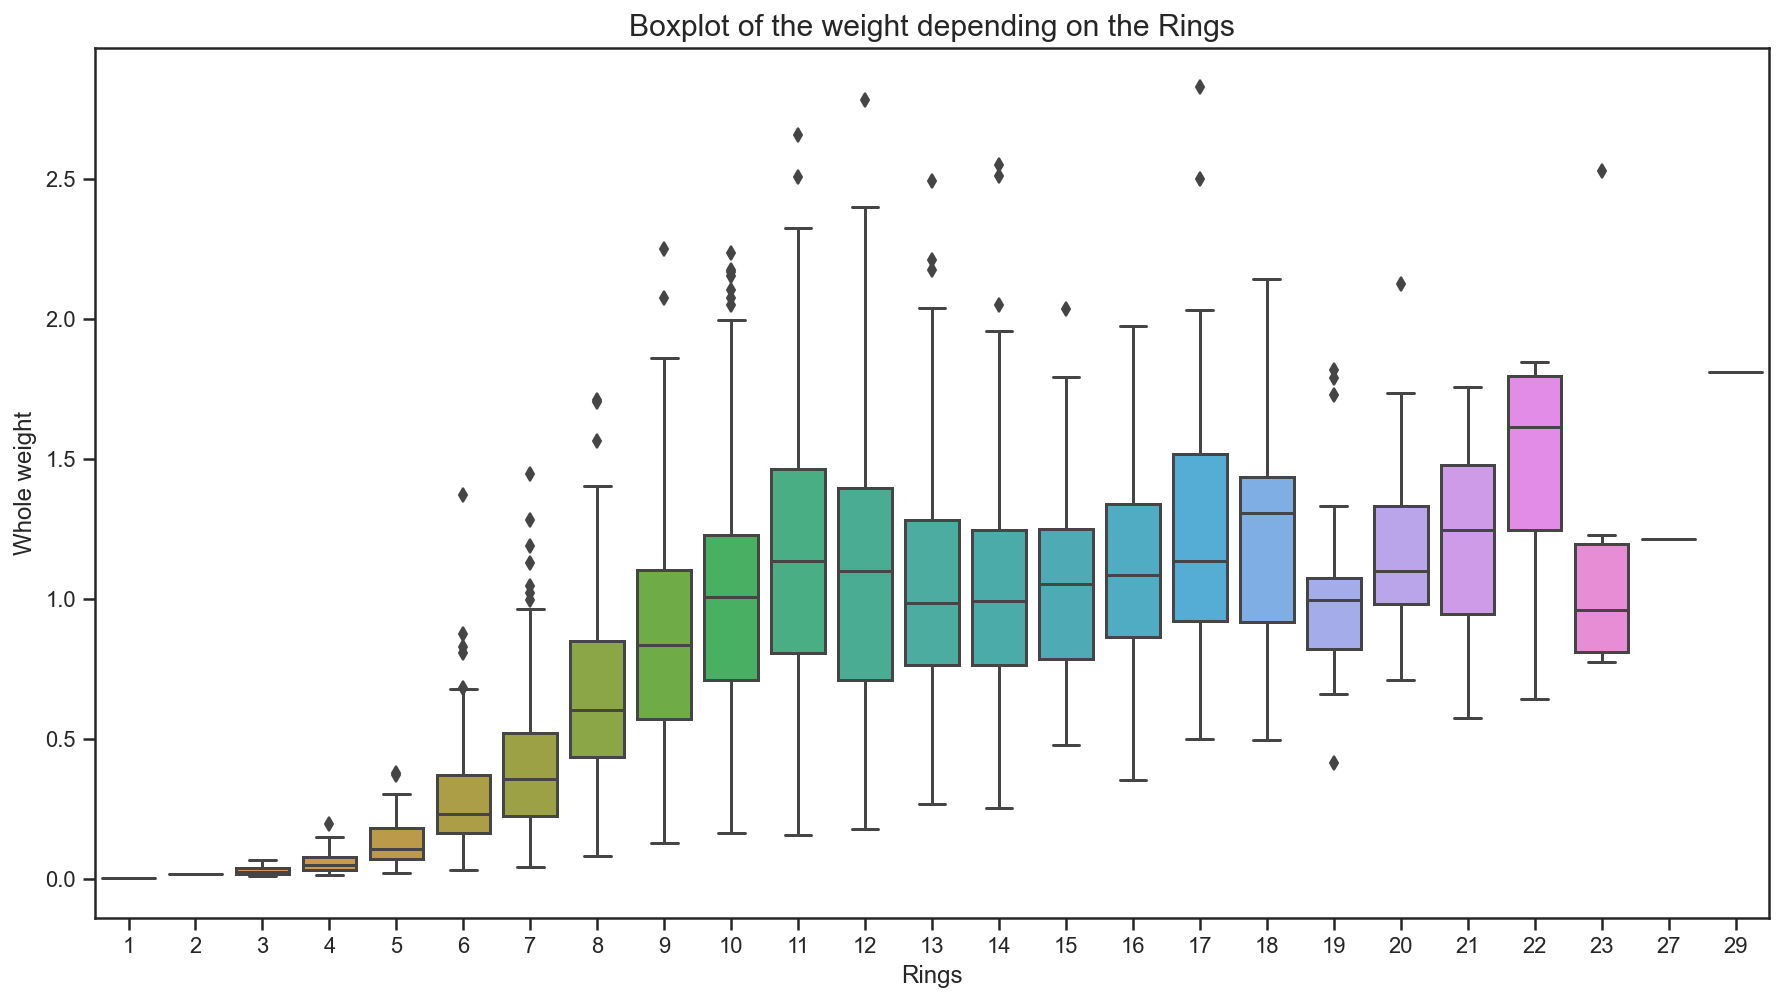

In [23]:
plt.figure(figsize = (15,8))
sns.boxplot(cdc['Rings'], cdc['Whole weight']);
plt.title('Boxplot of the weight depending on the Rings', fontsize = 15)
plt.show();

#### Barplot of Height according to Age

Looking into this barplot to determine if the age will affect the height of the abalone or not, we can observe that the height increases with respect to age.

Text(0, 0.5, 'Height')

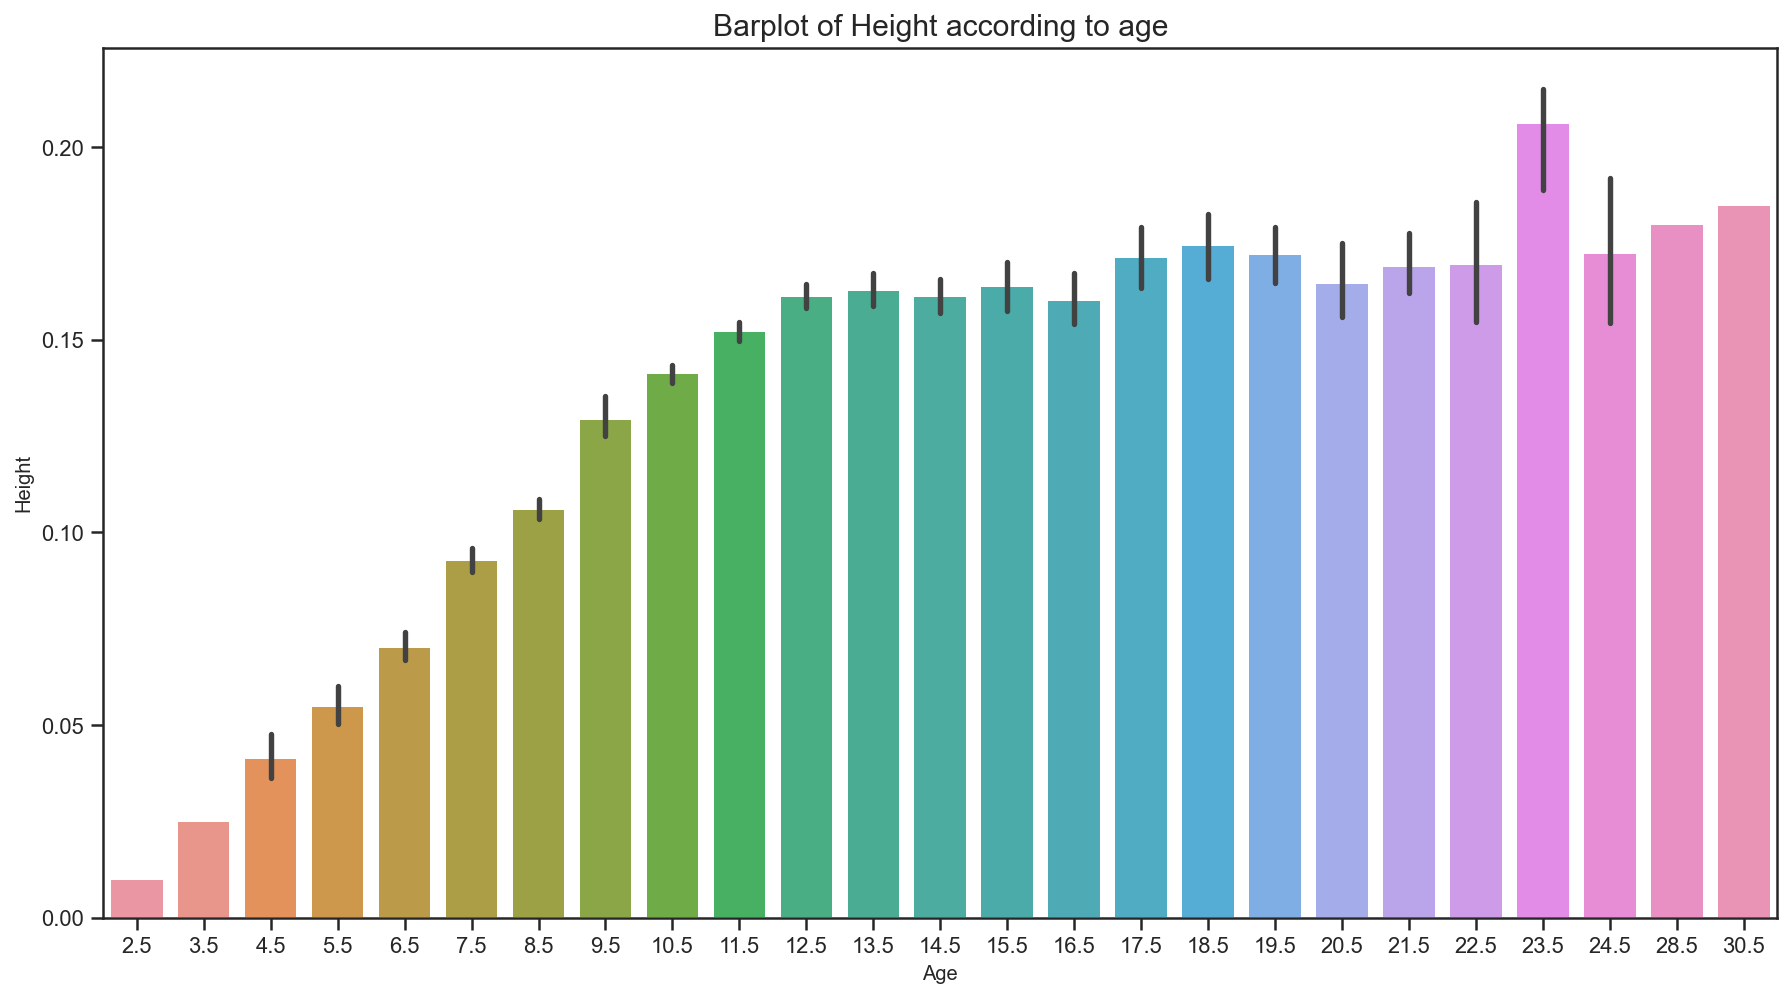

In [24]:
plt.figure(figsize = (15,8))
fig_4 = sns.barplot(x ='Age', y ='Height', data = cdc)
plt.title('Barplot of Height according to age', fontsize = 15)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Height', fontsize = 10) 

#### Violin and strip plot of Height according to Age

Here we have a violin plot and a scatter plot which both shows the density of each gender count on which age. The female age is the oldest and the infants are the youngest. Most common ages are from 7 to 14.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

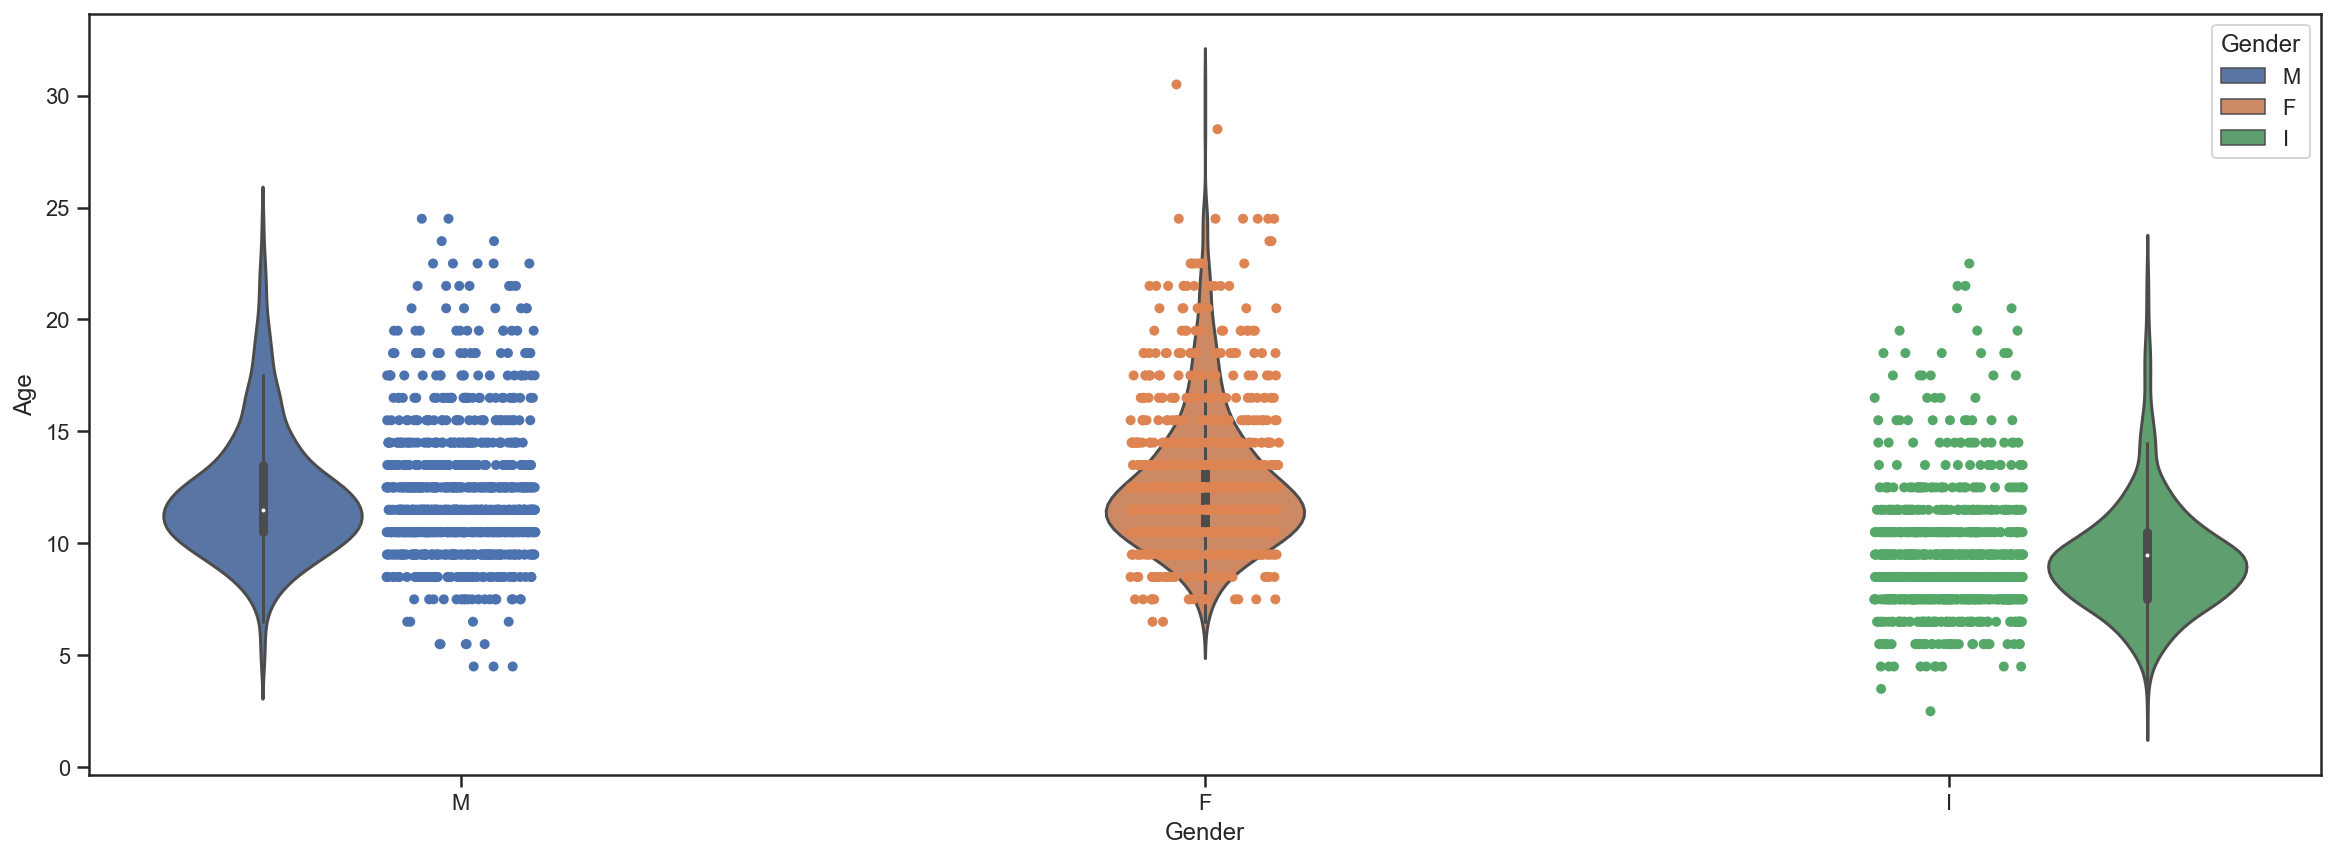

In [25]:
plt.figure(figsize = (20,7))
sns.violinplot(x = 'Gender', y = 'Age', data = cdc, hue = 'Gender')
sns.stripplot(x = 'Gender', y = 'Age',data = cdc)

### Three-Variable Visualisation

#### Barplot of how many Rings each Gender has at what Age

Using this barplot, we can see that the female abalones seems to have to most rings compared to the other 2 genders. Since the infants are young abalones getting ready to grow, they mostly have lower amounts of rings than both the male and female genders.

Text(0, 0.5, 'Age')

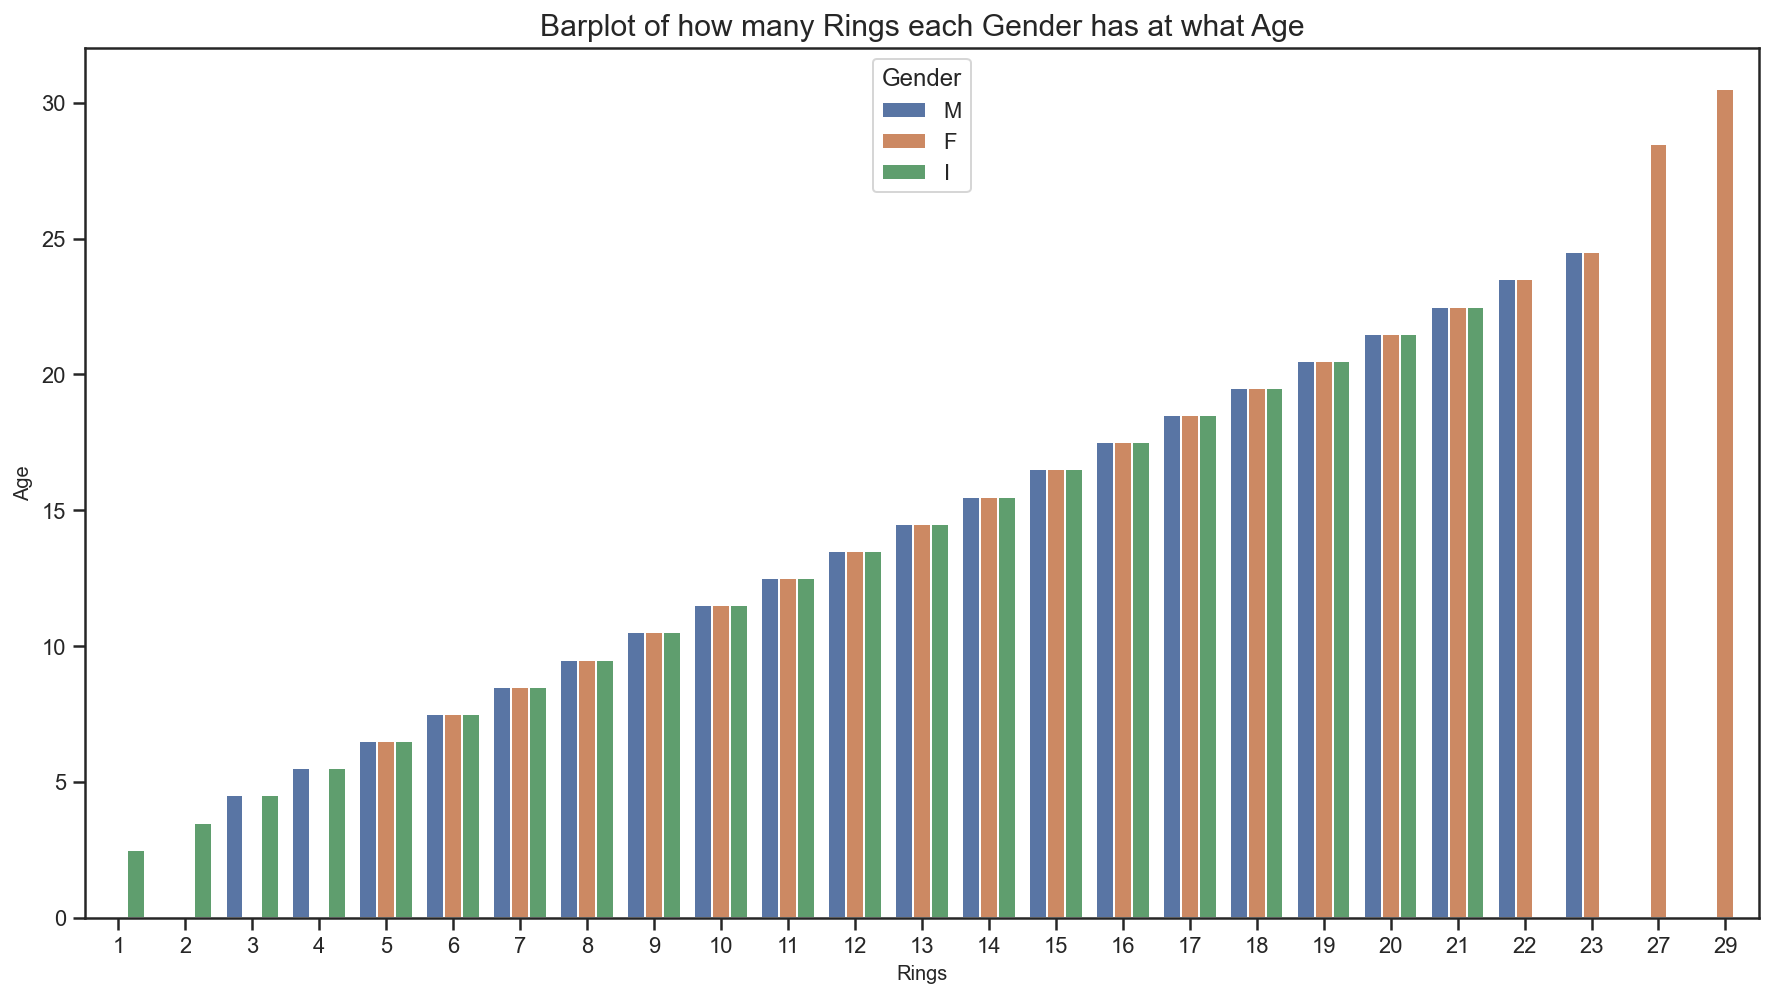

In [26]:
plt.figure(figsize = (15,8))
fig_4 = sns.barplot(x ='Rings', y ='Age', hue = 'Gender', data = cdc)
plt.title('Barplot of how many Rings each Gender has at what Age', fontsize = 15)
plt.xlabel('Rings', fontsize = 10)
plt.ylabel('Age', fontsize = 10) 

#### Scatterplot of Height by Length coloured by Gender

This scatter plot depicts the length and the height of abalone depending on their genders. What you can see from this graph is that the male and female abalones are very closely grouped and are not that far dispersed.

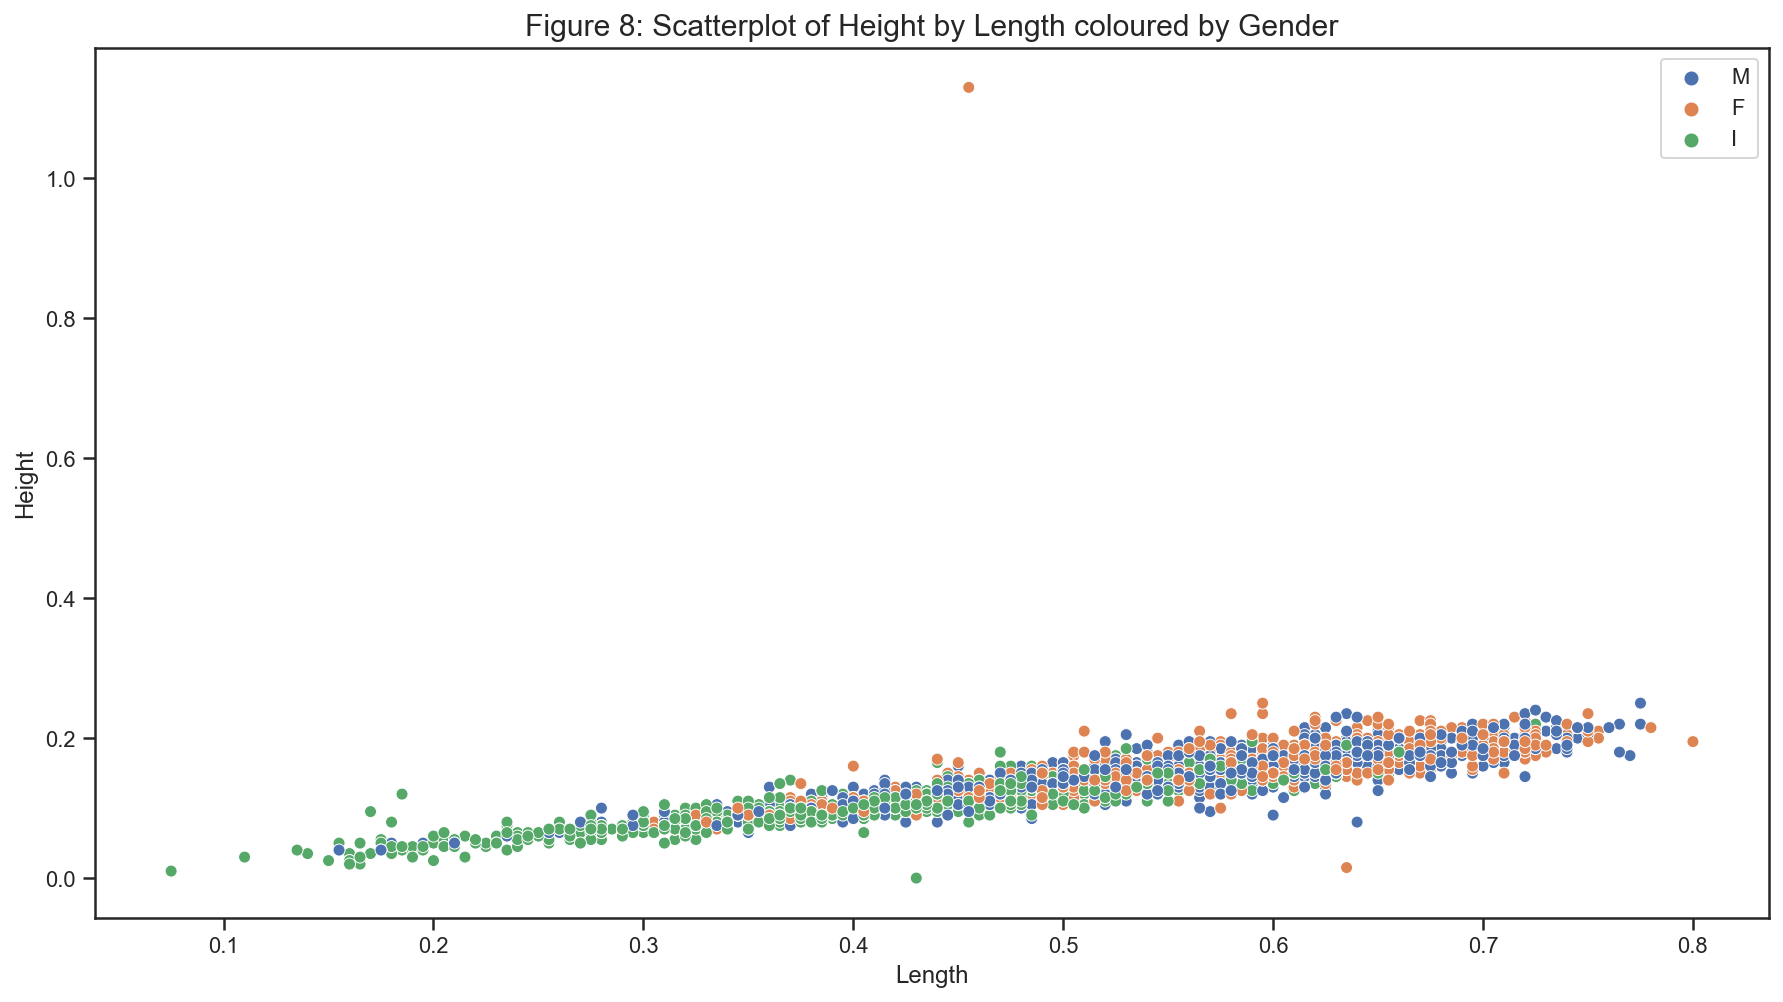

In [27]:
plt.figure(figsize = (15,8))
sns.scatterplot(cdc['Length'], cdc['Height'], hue = cdc['Gender'])
plt.title('Figure 8: Scatterplot of Height by Length coloured by Gender', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

#### Line plot of the Viscera weight compared to the Shell Weight, counted by each gender

This line plot depicts the viscera weight vs the shell weight depending on their gender, as you can see generally the infant abalones are much lower in both weights compared to fully grown male and female abelones.

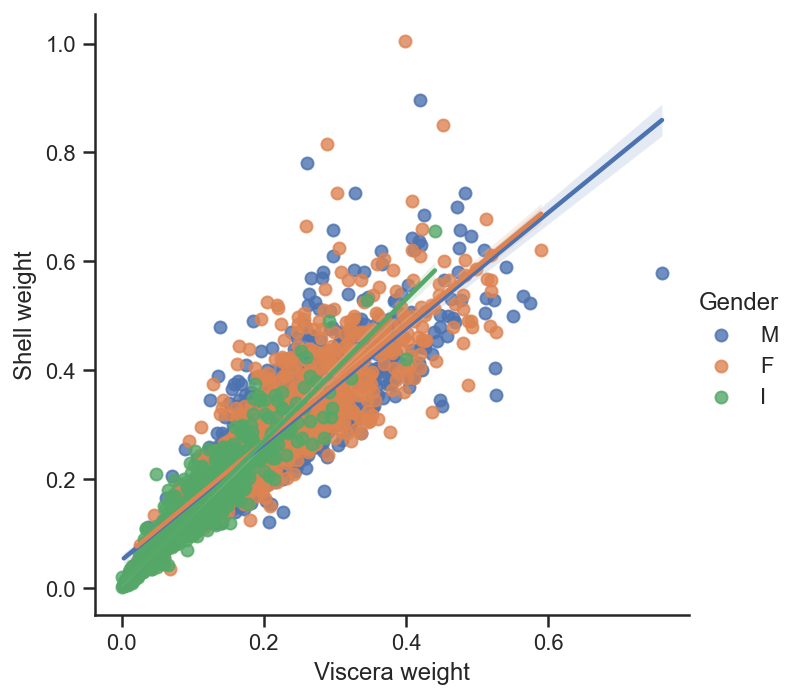

In [28]:
g = sns.lmplot(x="Viscera weight", 
               y="Shell weight", 
               hue="Gender",
               data=cdc);

# set axis labels
g.set_axis_labels("Viscera weight", "Shell weight");

## Summary and Conclusions

Our project's main goal is to determine an abalone's age based on its physical measurements. At first we gathered a data set source and the data comes from an original (non-machine-learning) study: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994) "The Population Biology of Abalone (Haliotis species) in Tasmania. I. Blacklip Abalone (H. rubra) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288). The age of an abalone is inferred using this dataset. Finding the age of an abalone is a difficult procedure that takes some time since each physical characteristic of the animal must be found with care and attention. The abalone must first be split into pieces, then stained, and then its rings must be counted. The abalone's length, diameter, height, and weight, among other things, will help determine how it lived and developed. We exhibit 20 rows from this dataset, which consists of 9 characteristics and 4178 observations altogether. The modules we'll utilize throughout this report are loaded, the dataset is read in from our GitHub repository, and 20 rows of this dataset are displayed. The table below lists the characteristics of our dataset, including their names, data types, units, and descriptions. The specifications are obtained from the data.world data source. The age of the Abalone in years will be the dataset's goal feature for this project. In other words, ages will be projected based on observable variables. The goal of this data study is to shed light on how certain abalone traits might aid in determining a person's age for future generations. For instance, based on the physical qualities of an abalone, consumers may use the prediction model to determine its age and kind. The project's major goal is to identify abalone and learn how to estimate its age from its physical properties. A further goal is to better comprehend how the ages of abalone fluctuate according on the patterns or linkages that present in the data. Additionally, it can assist abalone fishing businesses while working with the species to determine if they can catch a higher price owing to its age and flavours. We outline the data preparation and cleaning procedures used for this project, which include removing any unnecessary features from the dataset, checking and changing some column names, checking for missing values, removing any rows with missing values, and randomly selecting 5000 rows from the dataset. Each abalone's age will be determined by adding 1.5 to the number of rings it possesses. We included it in the table so that users could see the age of each abalone in addition to making it simpler to see. The data types are then checked, and because they match the anticipated data types, no changes are required. To check for any white spaces and other data quality concerns, the unique values for all columns with categorical data types are shown. In this case, no additional data cleaning procedures are required because the data is already clean. All the numerical aspects are given summary statistics along with data that does not appear to include any outliers. No missing values were found in the dataset, as shown in table 2's summary of numerical characteristics. Since there are more than 3000 rows in the data, only 3000 rows were randomly selected for analysis out of the remaining 4177 rows. Finally, 5 randomly selected rows from our cleaned data are shown. Now that our dataset has been deemed clean, we can begin visualising and examining each of the characteristics. According to Figure 1, abalone typically weighs between 0.5 and 1 grams. Figure 2 shows that abalone is most frequently found at a height of 0.2 mm. According to this right-skewed graph, which indicates that most abalone live slightly over 10 years, the average age of an abalone is between 10 and 15 years. As we can see, abalone typically have between 6 and 12 rings, and this graph is right-skewed, like the box plot of age, which demonstrates a clear association between rings and abalone age. Age and Whole Weight are correlated, as shown by the next figure. The overall weight tends to be higher as age rises. Not only does it demonstrate the relationship between weight and age, but it also demonstrates that both the weight and age of the abalone have historically been positively biased. The varying counts of each abalone gender are displayed in the graph. It enables us to determine which gender of abalone is more prevalent worldwide. According to the graph, the male abalone is the most prevalent species, while the female is the least prevalent. This scatter plot contrasts the weight of each shell in relation to the age of the abalone. This scatter figure contrasts the weights of the various meats based on the age of the abalone. The scatter plot compares the weights of each dried abalone based on its age. When we compare the three scatter plots and each sort of weight to the ages of the abalone, there aren't many differences in the data. The shell weight appears to be the heaviest in this instance, although the shucked and viscera weights are comparable in the data. The female abalones appear to have the most rings compared to the other 2 genders, as seen by the barplot. The neonates have fewer rings than both the male and female genders since they are young abalones preparing to mature. Looking at this boxplot to see if the number of rings would effect the abalone's weight or not, we can see that the rings don't weigh the abalones down.


***